In [2]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap, scipy
import sympy

x = sympy.Symbol('x')
e = jnp.e

!git clone https://github.com/SebastianSeljak/RadiusOfConvergence.git
%cd RadiusOfConvergence

from radius_of_convergence import taylor_approx, truncated_fft, analyze_function

Cloning into 'RadiusOfConvergence'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 106 (delta 55), reused 65 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 636.67 KiB | 7.15 MiB/s, done.
Resolving deltas: 100% (55/55), done.
/content/RadiusOfConvergence


In [3]:

# WORKING EXAMPLE
def f4(x):
    return jnp.log(x) # Define a function using jnp
f4_expr = sympy.log(x) # Define its symbolic notation

# First issue: originally, we were evaluating at ln(0), which blows up. Not has been changed to 2.51, and the interval is now 2.51 +/- 50*0.1, so (0.01, 5.01)
f4_fourier_expr, _ = truncated_fft(f4, order=3, point=2.51, N=50, ds=0.1, plot=False) # Your interval is point +/- N*ds. This must be a continuous part of the function
f4_fourier = sympy.lambdify(x, f4_fourier_expr, 'jax') # Convert the symbolic expression to a jax function, not numpy

f4_taylor_expr = taylor_approx(f4, point=2.51, order=4, plot=False) # This is the taylor approximation, also has plotting functionality now
f4_taylor = sympy.lambdify(x, f4_taylor_expr, 'jax') # Same process as above

analyze_function(f4, f4_expr) # This prints out the roots of the function, and correct intervals (I believe, it looks like it's working)
analyze_function(f4_taylor, f4_taylor_expr) # This prints out the roots of the taylor approximation
# HERE WAS SECOND ISSUE: sympy can't solve roots of fourier series. Just copy paste the sympy expression into desmos, set p = 1, i = pi (so that the constants work out),
# and find the roots manually. This is probably the easiest way to do it.
analyze_function(f4_fourier, f4_fourier_expr, real_roots=[-0.1698, 0.95926])

Generated function: log(x)
Real roots: [1.00000000000000]
Radius of convergence data: [(np.float64(-0.0), np.float64(2.7179))]
Generated function: 0.398406386375427*x - 0.250000001692838*(0.398406374501992*x - 1)**4 + 0.333333351168595*(0.398406374501992*x - 1)**3 - 0.500000020885467*(0.398406374501992*x - 1)**2 - 0.0797173082828522
Real roots: [0.963116149761498, 7.30510728041433]
Radius of convergence data: [(np.float64(-73.51332), np.float64(5.01995)), (np.float64(5.14686), None)]
Generated function: -0.768110632896423*sin(0.4*pi*x) - 0.48536804318428*sin(0.8*pi*x) - 0.360507190227509*sin(1.2*pi*x) - 0.57704746723175*cos(0.4*pi*x) - 0.36581215262413*cos(0.8*pi*x) - 0.291004598140717*cos(1.2*pi*x) + 0.551481544971466
Radius of convergence data: [(0.0, 0.0), (np.float64(0.39307), np.float64(1.27819))]


(-0.768110632896423*sin(0.4*pi*x) - 0.48536804318428*sin(0.8*pi*x) - 0.360507190227509*sin(1.2*pi*x) - 0.57704746723175*cos(0.4*pi*x) - 0.36581215262413*cos(0.8*pi*x) - 0.291004598140717*cos(1.2*pi*x) + 0.551481544971466,
 [-0.1698, 0.95926])

In [4]:
#non-exponential functions(polynomials and trig mixed with polynomials)
def func1(x):
   return jnp.square(x) - (2*x) - 4
func1_expr = x**2 - 2*x - 4
func1_tay_approx_expr = taylor_approx(func1, 0.0, 4)
func1_tay_approx = sympy.lambdify(x, func1_tay_approx_expr)
func1_fourier_expr = truncated_fft(func1, 3)[0]
func1_fourier = sympy.lambdify(x, func1_fourier_expr)

def func2(x):
   return jnp.power(x, 3) + 2 * jnp.power(x, 2) + (4*x) + 3
func2_expr = x**3 + 2*x**2 + 4*x + 3
func2_tay_approx_expr = taylor_approx(func2, 0.0, 4)
func2_tay_approx = sympy.lambdify(x, func2_tay_approx_expr)
func2_fourier_expr = truncated_fft(func2, 3)[0]
func2_fourier = sympy.lambdify(x, func2_fourier_expr)

def func3(x):
   return jnp.cos(x)
func3_expr = sympy.cos(x)
func3_tay_approx_expr = taylor_approx(func3, 0.0, 4)
func3_tay_approx = sympy.lambdify(x, func3_tay_approx_expr)
func3_fourier_expr = truncated_fft(func3, 3)[0]
func3_fourier = sympy.lambdify(x, func3_fourier_expr)


def func4(x):
    return jnp.power(x, 2) - jnp.cos(x)
func4_expr = x**2 - sympy.cos(x)
func4_tay_approx_expr = taylor_approx(func4, 0.0, 4)
func4_tay_approx = sympy.lambdify(x, func4_tay_approx_expr)
func4_fourier_expr = truncated_fft(func4, 3)[0]
func4_fourier = sympy.lambdify(x, func4_fourier_expr)

def func5(x):
    return jnp.power(x,3) - jnp.sin(x)
func5_expr = x**3 - sympy.sin(x)
func5_tay_approx_expr = taylor_approx(func5, 0.0, 4)
func5_tay_approx = sympy.lambdify(x, func5_tay_approx_expr)
func5_fourier_expr = truncated_fft(func5, 3)[0]
func5_fourier = sympy.lambdify(x, func5_fourier_expr)


def func6(x):
    return jnp.sin(x)
func6_expr = sympy.sin(x)
func6_tay_approx_expr = taylor_approx(func6, 0.0, 4)
func6_tay_approx = sympy.lambdify(x, func6_tay_approx_expr)
func6_fourier_expr = truncated_fft(func6, 3)[0]
func6_fourier = sympy.lambdify(x, func6_fourier_expr)


In [5]:
functions = [  # following Sebastian's example more closely
    (lambda x: jnp.square(x) - (2*x) - 4, x**2 - 2*x - 4),
    (lambda x: jnp.power(x, 3) + 2 * jnp.power(x, 2) + (4*x) + 3, x**3 + 2*x**2 + 4*x + 3),
    (lambda x: jnp.cos(x), sympy.cos(x)),
    (lambda x: jnp.power(x, 2) - jnp.cos(x), x**2 - sympy.cos(x)),
    (lambda x: jnp.power(x, 3) - jnp.sin(x), x**3 - sympy.sin(x)),
    (lambda x: jnp.sin(x), sympy.sin(x))
]

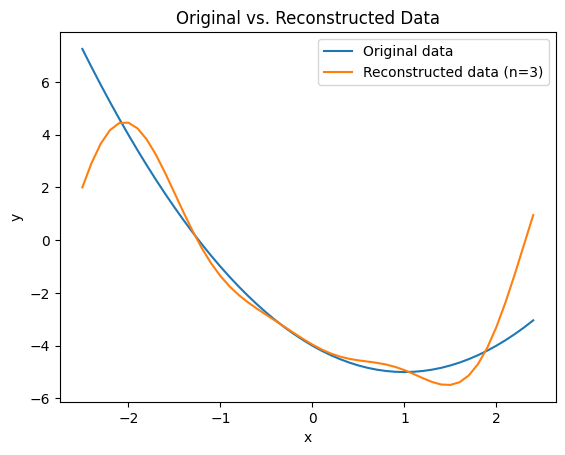

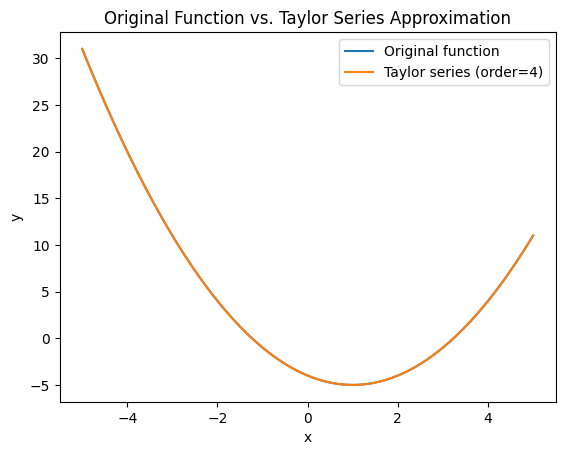

Original Function: x**2 - 2*x - 4
   Taylor Approximation: 1.0*x**2 - 2.0*x - 4.0
   Fourier Approximation: 3.17890882492065*sin(0.4*pi*x) + 1.58316290378571*sin(0.8*pi*x) + 1.04843664169312*sin(1.2*pi*x) + 2.73636531829834*cos(0.4*pi*x) + 0.836601257324219*cos(0.8*pi*x) + 0.484804898500443*cos(1.2*pi*x) - 1.81500005722046
--------------------------------------------------


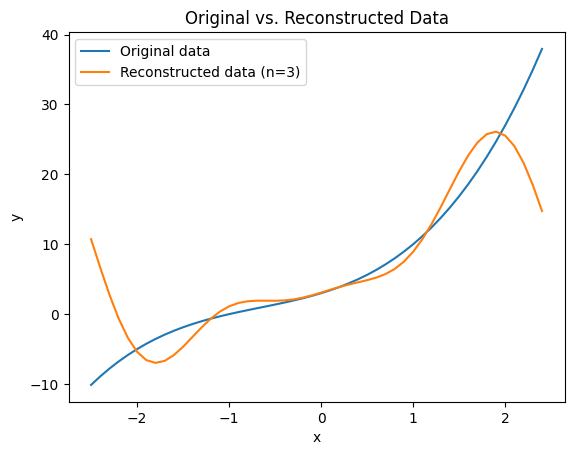

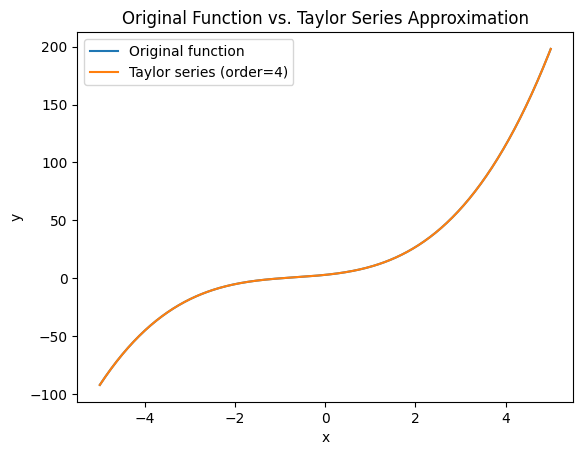

Original Function: x**3 + 2*x**2 + 4*x + 3
   Taylor Approximation: 1.0*x**3 + 2.0*x**2 + 4.0*x + 3.0
   Fourier Approximation: -10.2447519302368*sin(0.4*pi*x) - 7.35782766342163*sin(0.8*pi*x) - 5.14928817749023*sin(1.2*pi*x) + 4.04773092269897*cos(0.4*pi*x) + 0.248202472925186*cos(0.8*pi*x) - 0.455390185117722*cos(1.2*pi*x) + 6.65749979019165
--------------------------------------------------


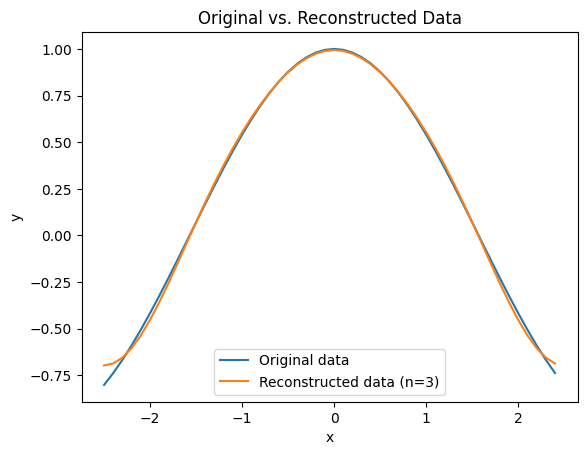

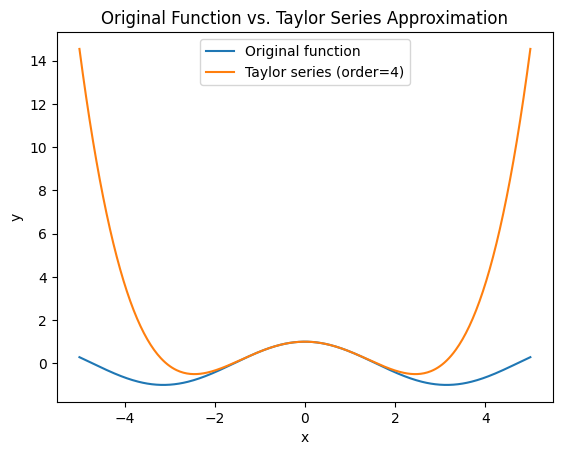

Original Function: cos(x)
   Taylor Approximation: 0.0416666666666667*x**4 - 0.5*x**2 + 1.0
   Fourier Approximation: -3.33066887535212e-17*sin(0.4*pi*x) - 1.66533449971461e-18*sin(0.8*pi*x) - 3.32260651135769e-17*sin(1.2*pi*x) - 0.827108681201935*cos(0.4*pi*x) - 0.090454563498497*cos(0.8*pi*x) - 0.0366393700242043*cos(1.2*pi*x) + 0.239189341664314
--------------------------------------------------


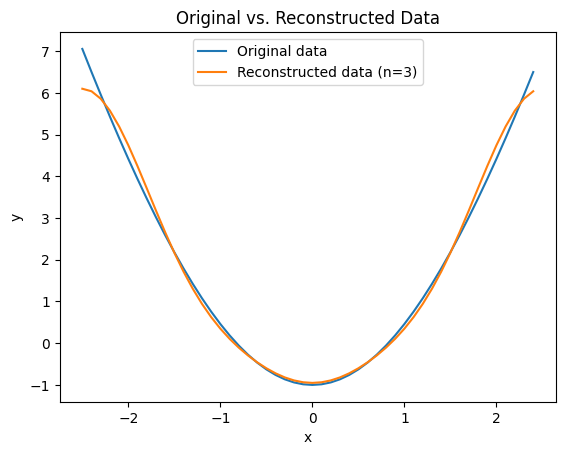

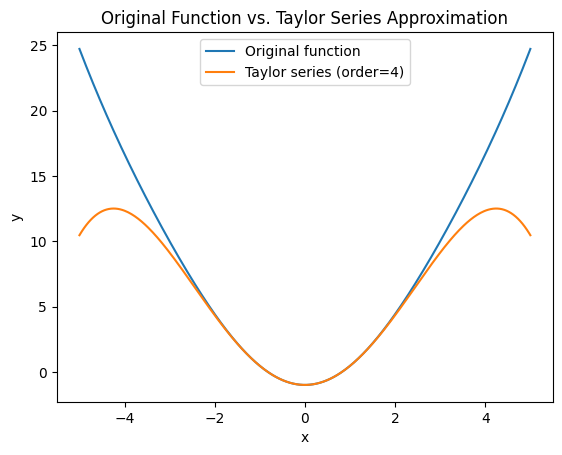

Original Function: x**2 - cos(x)
   Taylor Approximation: -0.0416666666666667*x**4 + 1.5*x**2 - 1.0
   Fourier Approximation: 1.68753897625441e-16*sin(0.4*pi*x) + 4.44089183380283e-17*sin(0.8*pi*x) + 5.41402945805757e-17*sin(1.2*pi*x) + 3.36347413063049*cos(0.4*pi*x) + 0.727055847644806*cos(0.8*pi*x) + 0.321444272994995*cos(1.2*pi*x) + 1.84581065177917
--------------------------------------------------


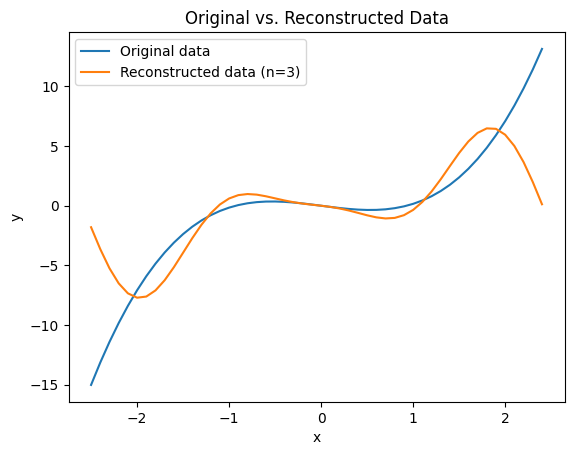

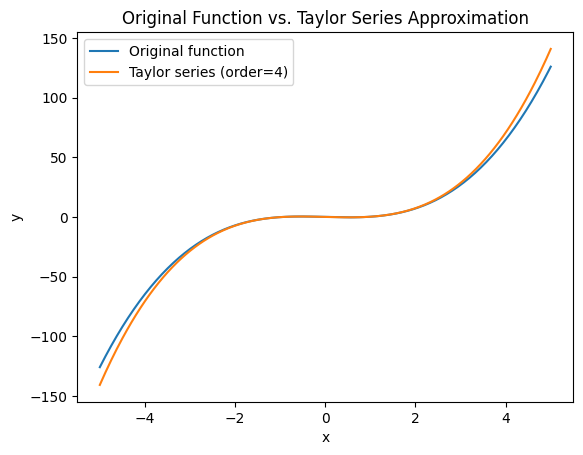

Original Function: x**3 - sin(x)
   Taylor Approximation: 1.16666666666667*x**3 - 1.0*x
   Fourier Approximation: -2.84856224060059*sin(0.4*pi*x) - 3.96617484092712*sin(0.8*pi*x) - 2.91731095314026*sin(1.2*pi*x) - 0.601061105728149*cos(0.4*pi*x) - 0.601061105728149*cos(0.8*pi*x) - 0.601061105728149*cos(1.2*pi*x) - 0.300530552864075
--------------------------------------------------


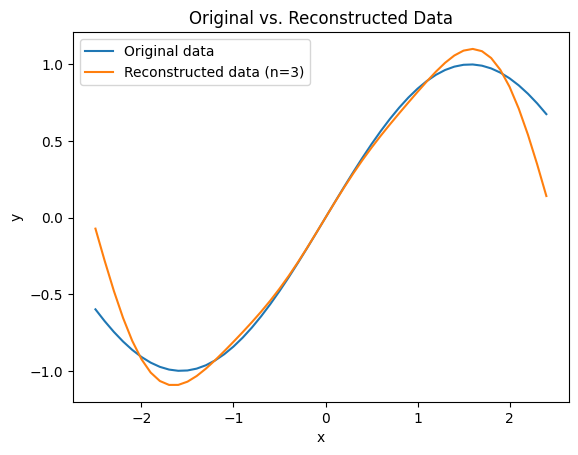

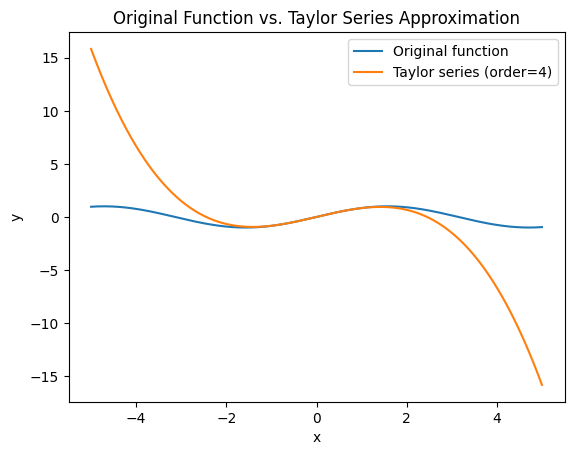

Original Function: sin(x)
   Taylor Approximation: -0.166666666666667*x**3 + 1.0*x
   Fourier Approximation: -1.03837180137634*sin(0.4*pi*x) - 0.225326746702194*sin(0.8*pi*x) - 0.135103553533554*sin(1.2*pi*x) - 0.0239388849586248*cos(0.4*pi*x) - 0.0239388849586248*cos(0.8*pi*x) - 0.0239388849586248*cos(1.2*pi*x) - 0.0119694424793124
--------------------------------------------------


In [7]:
fourier_expressions = {}  # first pass of the functions, just getting all of the expressions, fourier particulary, to then manually get real roots
taylor_expressions = {}

for f, f_expr in functions:
    f_fourier_expr, _ = truncated_fft(f, order=3, point=0.0, N=50, ds=0.1, plot=True)
    f_taylor_expr = taylor_approx(f, point=0.0, order=4, plot=True)

    fourier_expressions[f_expr] = f_fourier_expr
    taylor_expressions[f_expr] = f_taylor_expr

    # printing results
    print(f"Original Function: {f_expr}")
    print(f"   Taylor Approximation: {f_taylor_expr}")
    print(f"   Fourier Approximation: {f_fourier_expr}")
    print("-" * 50)  # Separator for clarity


In [8]:
fourier_roots_dict = {
    x**2 - 2*x - 4: [-0.17391, 1.16614],
    x**3 + 2*x**2 + 4*x + 3: [0.21993,1.15691,1.86666,2.21729],
    sympy.cos(x): [-1.02301,-0.12955],
    x**2 - sympy.cos(x): [], # NO ROOTS
    x**3 - sympy.sin(x): [-0.0847,1.21012,1.79326,2.43637,3.0924,3.72917],
    sympy.sin(x): [-0.0351,2.49042]
}

manual_roots_dict = {  # had to manually find roots for the mixed trig functions
    x**2 - sympy.cos(x): [-0.82413, 0.82413],
    x**3 - sympy.sin(x): [-0.92863,0,0.92683],
}

auto_roots_dict = {} # where functions which can use sympy solve's roots are stored

for f, f_expr in functions: # test loop
    f_fourier_expr = fourier_expressions[f_expr]
    f_taylor_expr = taylor_expressions[f_expr]

    f_fourier = sympy.lambdify(x, f_fourier_expr, 'jax')
    f_taylor = sympy.lambdify(x, f_taylor_expr, 'jax')

    # Run analysis using real roots

    fourier_roots=fourier_roots_dict.get(f_expr, []) # grabbing the manual roots to use in fourier function

    print(f"Analyzing function: {f_expr}")
    # Check if function requires manual roots (i.e. mixed trig function)
    needs_manual_roots = f_expr in manual_roots_dict

    if needs_manual_roots:
        real_roots = manual_roots_dict[f_expr]
        print(f"Using manually found roots for {f_expr}: {real_roots}") # access dictionary
    else:
        analyze_function(f, f_expr)  # if works normally

    analyze_function(f_taylor, f_taylor_expr)
    if fourier_roots:
        analyze_function(f_fourier, f_fourier_expr, real_roots=fourier_roots)
    else:
        print(f"Skipping Fourier analysis for {f_expr} (No known real roots).")
    print("=" * 50)


Analyzing function: x**2 - 2*x - 4
Generated function: x**2 - 2*x - 4
Real roots: [-1.23606797749979, 3.23606797749979]
Radius of convergence data: [(None, np.float64(1.0)), (np.float64(1.0), None)]
Generated function: 1.0*x**2 - 2.0*x - 4.0
Real roots: [-1.23606797749979, 3.23606797749979]
Radius of convergence data: [(None, np.float64(1.0)), (np.float64(1.0), None)]
Generated function: 3.17890882492065*sin(0.4*pi*x) + 1.58316290378571*sin(0.8*pi*x) + 1.04843664169312*sin(1.2*pi*x) + 2.73636531829834*cos(0.4*pi*x) + 0.836601257324219*cos(0.8*pi*x) + 0.484804898500443*cos(1.2*pi*x) - 1.81500005722046
Radius of convergence data: [(0.0, 0.0), (0.0, 0.0)]
Analyzing function: x**3 + 2*x**2 + 4*x + 3
Generated function: x**3 + 2*x**2 + 4*x + 3
Real roots: [-1.00000000000000]
Radius of convergence data: [(None, None)]
Generated function: 1.0*x**3 + 2.0*x**2 + 4.0*x + 3.0
Real roots: [-1.00000000000000]
Radius of convergence data: [(None, None)]
Generated function: -10.2447519302368*sin(0.4*p